In [17]:
import os

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import sys
sys.path.append('..')

from utils.plot_utils import *

In [18]:
# lê um csv com base no caminho passado
# e retorna um df com o weighted f1,
# campo e modelos

def return_df(path):
    df = pd.read_csv(
        '../output/simpsons-small-balanced/classification-report/' + path
    )

    field = path.split('.')[0]
    field = field.split('pipeline_')[1]
    field = field.split('_results')[0]

    df = df[df['labels'] == 'weighted avg'][['model', 'f1-score']]
    df['field'] = [field for i in range(len(df))]

    return df

# **CRIANDO UM** `DataFrame` **COM OS RESULTADOS**

In [19]:
output_paths = os.listdir(
    '../output/simpsons-small-balanced/classification-report/'
)

# criando um df com o primeiro csv
df = return_df(output_paths[0])

# concatenando os demais dfs no primeiro df
# para todos os arquivos csv

for path in output_paths[1:]:
    df_path = return_df(path)
    df = pd.concat([df, df_path], axis=0)

df = df.replace({
    'knn': 'KNN',
    'nb': 'GaussianNB',
    'lsvc': 'LinearSVC',
    'lgbm': 'LGBM',
    'xgb': 'XGBoost',
    'dc': 'DummyClassifier',
    'et': 'ExtraTrees',
    'rf': 'RandomForest',
    'svc': 'SVC',
    'lr': 'LogisticRegression',
    'mlp': 'MLP',
    'ab': 'AdaBoost'
})

# df['model'] = df['model'].map(
#     lambda x: x.upper() if 'stk' in x else x
# )

In [20]:
print(df.shape)
df.head()

(552, 3)


,model,f1-score,field
7,KNN,0.387913,combination_hsv+hog
15,GaussianNB,0.431765,combination_hsv+hog
23,LinearSVC,0.519452,combination_hsv+hog
31,SVC,0.361825,combination_hsv+hog
39,LogisticRegression,0.473147,combination_hsv+hog


In [5]:
# salvando a tabela sumarizada
df.to_csv(
    '../output/simpsons-small-balanced/classification-report-summary.csv',
    index=False
)

In [21]:
df_models = df[~((df['model'].str.contains('vote')) | \
                 (df['model'].str.contains('stk')) | \
                 (df['model'].str.contains('bag')))]

df_ensemb = df[((df['model'].str.contains('vote')) | \
                (df['model'].str.contains('stk')) | \
                (df['model'].str.contains('bag')))]

# **RESULTADOS DOS MODELOS CLÁSSICOS**

## **EXIBINDO** `f1-scores` **POR CAMPOS**

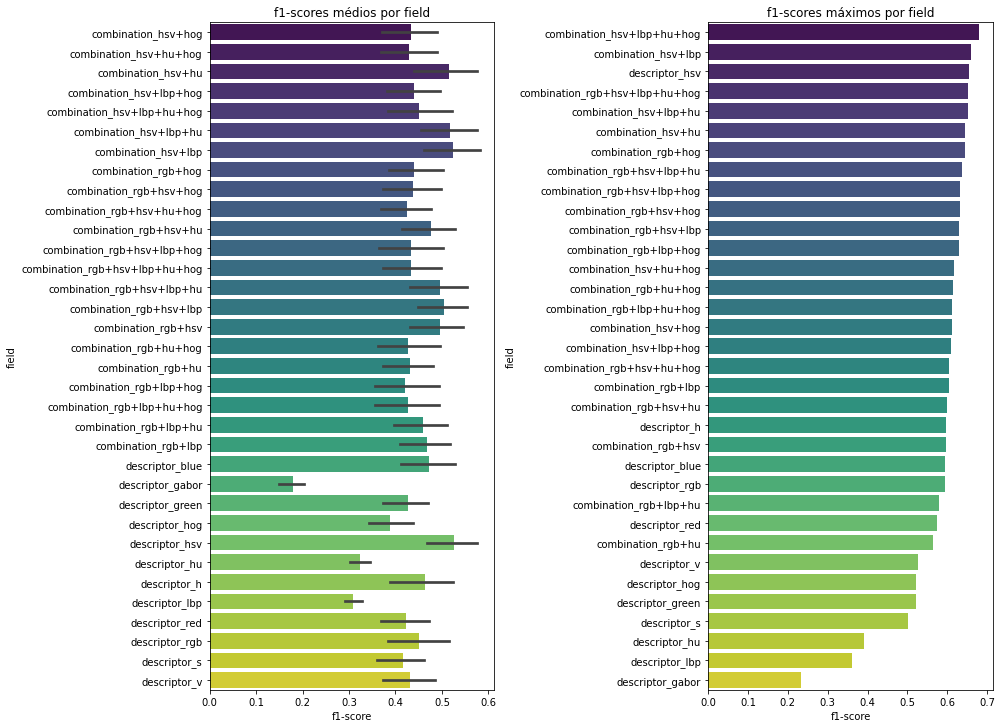

In [22]:
plot_scores_by_col(col='field', df=df_models)

## **EXIBINDO** `f1-scores` **POR MODELOS**

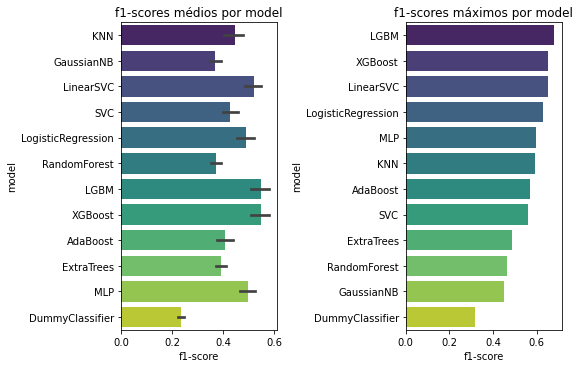

In [9]:
plot_scores_by_col(col='model', df=df_models, figsize=(8,5))

## **10 MELHORES RESULTADOS OBTIDOS**

In [10]:
# 10 melhores resultados para f1-score
df_models.sort_values(by='f1-score', ascending=False)[:10]

,model,f1-score,field
55,LGBM,0.680209,combination_hsv+lbp+hu+hog
55,LGBM,0.658943,combination_hsv+lbp
55,LGBM,0.655393,descriptor_hsv
63,XGBoost,0.653191,combination_rgb+hsv+lbp+hu+hog
23,LinearSVC,0.651370,combination_hsv+lbp+hu
63,XGBoost,0.645616,combination_hsv+hu
63,XGBoost,0.643884,combination_rgb+hog
63,XGBoost,0.640769,combination_hsv+lbp+hu+hog
63,XGBoost,0.639331,descriptor_hsv
23,LinearSVC,0.638166,combination_rgb+hsv+lbp+hu


# **RESULTADOS DOS ENSEMBLES**

## **EXIBINDO** `f1-scores` **POR CAMPOS**

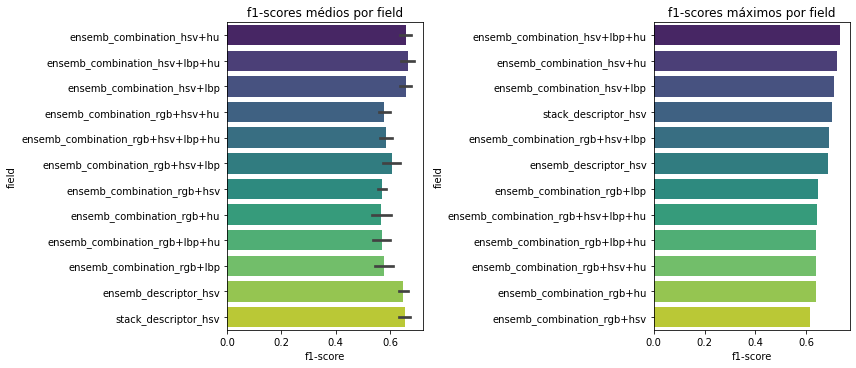

In [16]:
plot_scores_by_col(col='field', df=df_ensemb, figsize=(12,5))

## **EXIBINDO** `f1-scores` **POR MODELOS**

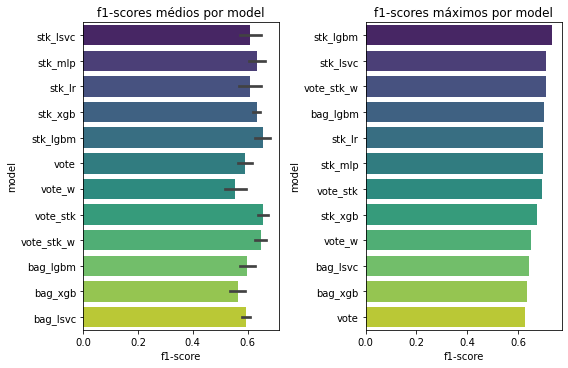

In [12]:
plot_scores_by_col(col='model', df=df_ensemb, figsize=(8,5))

## **10 MELHORES RESULTADOS OBTIDOS**

In [13]:
# 10 melhores resultados para f1-score
df_ensemb.sort_values(by='f1-score', ascending=False)[:10]

,model,f1-score,field
39,stk_lgbm,0.734506,ensemb_combination_hsv+lbp+hu
39,stk_lgbm,0.722820,ensemb_combination_hsv+hu
7,stk_lsvc,0.710786,ensemb_combination_hsv+lbp
71,vote_stk_w,0.710346,ensemb_combination_hsv+lbp+hu
79,bag_lgbm,0.701934,stack_descriptor_hsv
23,stk_lr,0.699766,ensemb_combination_hsv+lbp
15,stk_mlp,0.696637,ensemb_combination_hsv+lbp+hu
15,stk_mlp,0.695594,ensemb_combination_hsv+hu
63,vote_stk,0.695301,ensemb_combination_hsv+lbp
63,vote_stk,0.694397,ensemb_combination_hsv+lbp+hu
